# Floodplains module

Niche Vlaanderen also contains a module to model the influence of flooding more precisely. This is done using the FloodPlain class. 

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`.

In [1]:
import niche_vlaanderen as nv

Here the FloodPlain class is created. Like in Niche Vlaanderen, when creating the class, the model with its codetables is iniitialized.

In [2]:
fp = nv.FloodPlain()

The calculate method of the class takes four arguments: the depths (as grid), frequency, period and duration.

In [3]:
fp.calculate(depth_file="/home/johan/_proj/niche/Overstromingen_posthoc/TestCase_Dijle_input/ff_bt_t10_h/",
             frequency="T10", period="winter", duration=1)

The results can be plotted per vegetation type. Note that not all vegetation types of Niche are supported by the floodplains module.

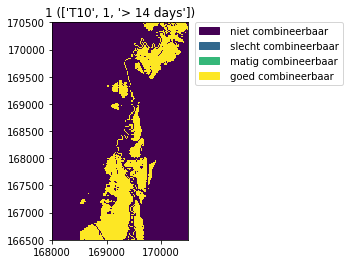

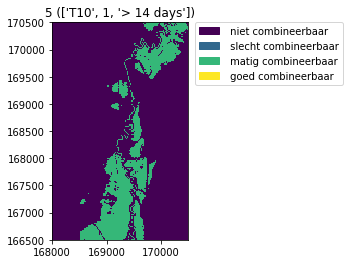

In [4]:
fp.plot(1)
fp.plot(5)
import matplotlib.pyplot as plt
plt.show()

Vergelijkbaar met de niche module kan de write methode gebruikt worden om de grids weg te schrijven.

In [5]:
fp.write("_output")

De output van een niche model kan ook met die van Floodplains gecombineerd worden.

In [6]:
# myniche = nv.Niche()
# input = "/home/johan/_proj/niche/TestCase_GWDRDijle_fout/Input"
# 
# myniche.set_input("msw", input +"/GXG/gvg_0_cm.asc")
# myniche.set_input("mlw", input +"/GXG/glg_0_cm.asc")
# myniche.set_input("mhw", input +"/GXG/ghg_0_cm.asc")
# myniche.set_input("seepage", input +"/GXG/kwel_mm_dag.asc")
# 
# myniche.set_input("management", input +"/Beheer/beheer_int")
# myniche.set_input("soil_code", input +"/Bodem/bodemv")
# 
# 
# myniche.set_input("nitrogen_atmospheric", input +"/Atmosf_depositie/depositie_def")
# myniche.set_input("nitrogen_animal", input +"/Bemesting/bemest_dier")
# myniche.set_input("nitrogen_fertilizer", input +"/Bemesting/bemest_kunst")
# 
# myniche.set_input("inundation_vegetation", input +"/Overstromingen/overstr_veg")
# myniche.set_input("inundation_acidity", input +"/Overstromingen/ovrstr_t10_50")
# myniche.set_input("inundation_nutrient", input +"/Overstromingen/ovrstr_t10_50")
# 
# myniche.set_input("minerality", "minerality.asc")
# 
# myniche.set_input("rainwater", input +"/nullgrid.asc")


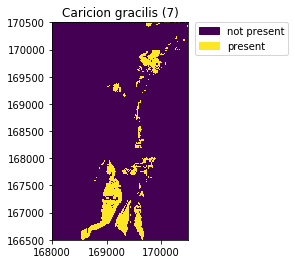

In [7]:
# myniche.run()
# myniche.plot(7)
# plt.show()

In [8]:
# z = fp.combine(myniche)

FloodPlainException: Niche model has a different spatial context:
Extent: ((168000.0, 170500.0), (170500.0, 166500.0))

Affine(20.0, 0.0, 168000.0,
       0.0, -20.0, 170500.0)

width: 125, height: 200

Projection: +ellps=intl +lat_0=90 +lat_1=49.8333339 +lat_2=51.16666723333333 +lon_0=4.367486666666666 +no_defs +proj=lcc +units=m +x_0=150000.013 +y_0=5400088.438Extent: ((168000.0, 170500.0), (170500.0, 166500.0))

Affine(20.0, 0.0, 168000.0,
       0.0, -20.0, 170500.0)

width: 125, height: 200

Projection: +ellps=intl +lat_0=90 +lat_1=51.16666723333333 +lat_2=49.8333339 +lon_0=4.367486666666666 +no_defs +proj=lcc +units=m +x_0=150000.013 +y_0=5400088.438

In [ ]:
nv.niche.conductivity2minerality("/home/johan/_proj/niche/TestCase_GWDRDijle_fout/Input/minrijkdom.asc", "minerality.asc")